Image npy shape: (256, 256, 3)
Mask npy shape: (256, 256)


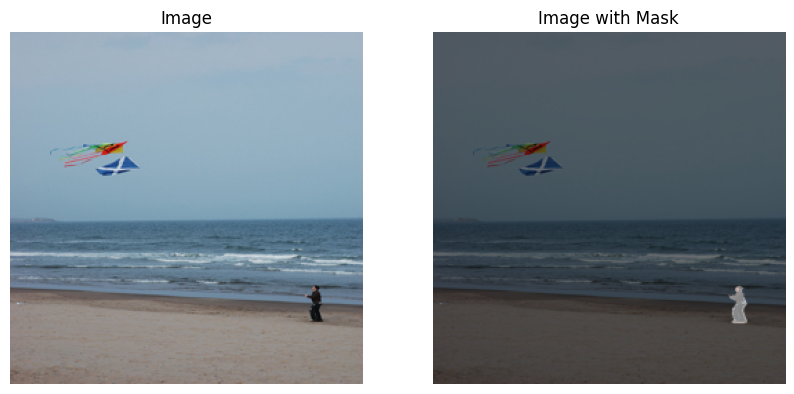

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

def visualize_npy_in_notebook(image_npy_path, mask_npy_path, vmin=0, vmax=1):    

    image = np.load(image_npy_path)
    mask = np.load(mask_npy_path)

    print(f"Image npy shape: {image.shape}")
    print(f"Mask npy shape: {mask.shape}")
    

    if image.shape[0] == 3:
        image = np.transpose(image, (1, 2, 0))  


    if mask.shape[0] == 1:
        mask = mask[0]  

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, vmin=vmin, vmax=vmax)
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(image, vmin=vmin, vmax=vmax)
    plt.imshow(mask, cmap='gray', alpha=0.5)  
    plt.title('Image with Mask')
    plt.axis('off')
    
    plt.show()




image_npy_path = '/mnt/sda/minkyukim/sam_dataset/coco_npy_train_dataset/imgs/100001.npy' 
mask_npy_path = '/mnt/sda/minkyukim/sam_dataset/coco_npy_train_dataset/gts/100001_1.npy'   

visualize_npy_in_notebook(image_npy_path, mask_npy_path, vmin=0, vmax=1)



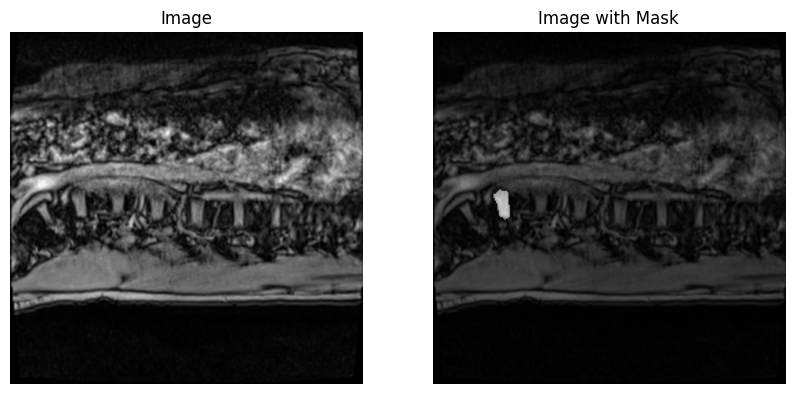

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom

def visualize_npy_in_notebook(image_npy_path, mask_npy_path, vmin=0, vmax=1):    

    image = np.load(image_npy_path)
    mask = np.load(mask_npy_path)
    

    if image.shape[0] == 3:
        image = np.transpose(image, (1, 2, 0))  


    if mask.shape[0] == 1:
        mask = mask[0]  

    if mask.shape != (1024, 1024):
        mask = zoom(mask, (1024 / mask.shape[0], 1024 / mask.shape[1]), order=0)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, vmin=vmin, vmax=vmax)
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(image, vmin=vmin, vmax=vmax)
    plt.imshow(mask, cmap='gray', alpha=0.5)  
    plt.title('Image with Mask')
    plt.axis('off')
    
    plt.show()




image_npy_path = '/mnt/sda/minkyukim/sam_dataset/ivdm_npy_train_dataset_1024image/imgs/05-8_opp.npy' 
mask_npy_path = '/mnt/sda/minkyukim/sam_dataset/ivdm_npy_train_dataset_1024image/gts/05-8_opp_1.npy'   

visualize_npy_in_notebook(image_npy_path, mask_npy_path, vmin=0, vmax=1)